### Student details

Student name: Mithun Thakkar

Student ID: 20017138

# Task 1: Adaline and Gradient Descent

* Iris Data Data obtained from https://archive.ics.uci.edu/ml/datasets/iris


In [6]:
# import dependencies
import numpy as np

### Adaline class (provided)
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

In [10]:
class AdalineGD(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            print(errors)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

### Read the data 
(provided - should be completed in previous E-tivity)

In [11]:
import pandas as pd
df = pd.read_csv('iris_data.csv', header=0)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

No handles with labels found to put in legend.


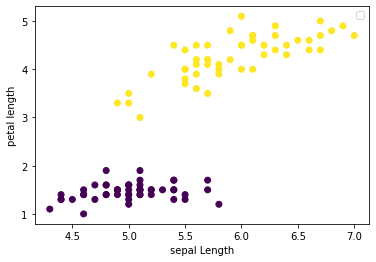

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c=y);
plt.xlabel("sepal Length")
plt.ylabel("petal length")
plt.legend()

### Examine the impact of learning rate

1. Train the gradient descent algorithm with eta = 0.01, eta = 0.001, eta = 0.0001. Plot the cost as a function of epoch in each case. Note: it is useful to plot some on a log scale
2. Explain what is happening in each case?
3. How many epochs (approx) for convergence with eta = 0.0001?
4. Can you find a learning rate that converges quicker, but without overshoot?
5. The learning rate can be very sensitive, a very small change can lead to overshoot. For example, have a look at what happens between a learnign rate of 0.00045 and 0.0005, just a 5e-5 change

Please note that this is just about the simplest gradient descent implementation posssible. There are much more advanced algorithms that are typically used that improve robustness, avoid local minima, avoid overshoot and improve convergence times. So it's not all as "on a knife edge" as this example. But, in principle, picking a learning rate is still an important topic of machine learning.

2 [0. 0. 0.]


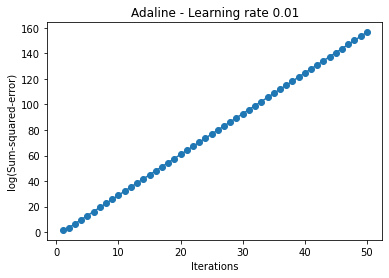

In [5]:
ada = AdalineGD(eta=0.01).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline - Learning rate 0.01')
plt.show()

#### Explanation

In the above plot, the learning rate is too large and hence gradient descent is overshooting the minima and is diverging.

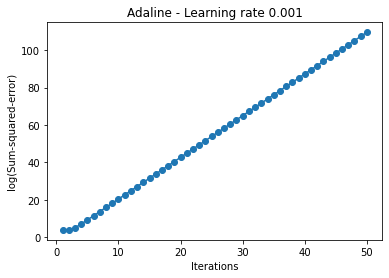

In [6]:
ada = AdalineGD(eta=0.001).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), np.log(ada.cost_), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline - Learning rate 0.001')
plt.show()

#### Explanation

In the above plot, the learning rate is still large and hence gradient descent is still overshooting the minima and is still diverging.

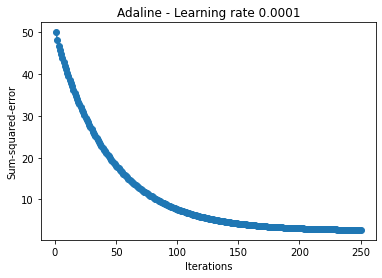

{0: 50, 1: 48, 2: 46, 3: 45, 4: 44, 5: 43, 6: 42, 7: 41, 8: 41, 9: 40, 10: 39, 11: 38, 12: 37, 13: 37, 14: 36, 15: 35, 16: 34, 17: 34, 18: 33, 19: 32, 20: 32, 21: 31, 22: 30, 23: 30, 24: 29, 25: 28, 26: 28, 27: 27, 28: 27, 29: 26, 30: 26, 31: 25, 32: 25, 33: 24, 34: 24, 35: 23, 36: 23, 37: 22, 38: 22, 39: 21, 40: 21, 41: 21, 42: 20, 43: 20, 44: 19, 45: 19, 46: 19, 47: 18, 48: 18, 49: 18, 50: 17, 51: 17, 52: 17, 53: 16, 54: 16, 55: 16, 56: 15, 57: 15, 58: 15, 59: 14, 60: 14, 61: 14, 62: 14, 63: 13, 64: 13, 65: 13, 66: 13, 67: 12, 68: 12, 69: 12, 70: 12, 71: 12, 72: 11, 73: 11, 74: 11, 75: 11, 76: 11, 77: 10, 78: 10, 79: 10, 80: 10, 81: 10, 82: 10, 83: 9, 84: 9, 85: 9, 86: 9, 87: 9, 88: 9, 89: 8, 90: 8, 91: 8, 92: 8, 93: 8, 94: 8, 95: 8, 96: 8, 97: 7, 98: 7, 99: 7, 100: 7, 101: 7, 102: 7, 103: 7, 104: 7, 105: 7, 106: 6, 107: 6, 108: 6, 109: 6, 110: 6, 111: 6, 112: 6, 113: 6, 114: 6, 115: 6, 116: 6, 117: 5, 118: 5, 119: 5, 120: 5, 121: 5, 122: 5, 123: 5, 124: 5, 125: 5, 126: 5, 127: 5, 12

In [45]:
ada = AdalineGD(epochs=250, eta=0.0001).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.0001')
plt.show()
dict_cost = {}
for i in range(len(ada.cost_)):
    dict_cost[i] = int(ada.cost_[i])
print(dict_cost)

#### Explanation

The learning rate above is too small in above plot and the algorithm is requiring too many epochs to converge to the local minima.

#### Number of epochs required for the GD to converge seem to be around 157 as per the above plot when we consider learning rate to be 0.0001. (Considering cost of 3 to be reasonable number for convergence as shown in dictionary printed above)

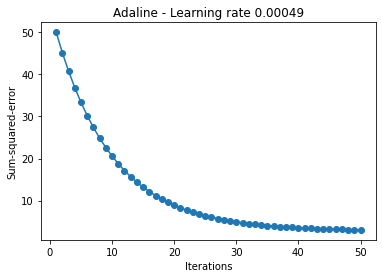

In [8]:
ada = AdalineGD(eta=0.00049).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.00049')
plt.show()

#### The best learning rate that converges to minima quicker, but without overshoot is 0.00049 as shown above.

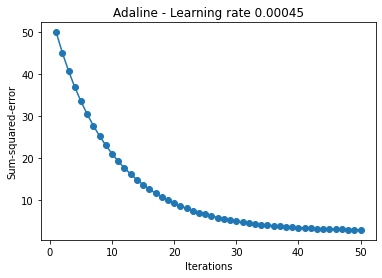

In [9]:
ada = AdalineGD(eta=0.00045).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.00045')
plt.show()

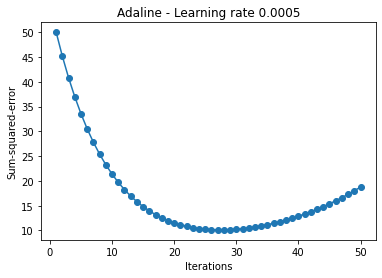

In [10]:
ada = AdalineGD(eta=0.0005).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.0005')
plt.show()

### Feature Scaling

A problem with features is that they can be on a different scale, and gradient descent can struggle with this. Feature scaling can reduce the sensitivity to learning rate, and can lead to faster convergence. One of the more common approaches to feature scaling is standardisation, given by:

\begin{equation}
\textbf{x}_{j,std} = \frac{\textbf{x}_j - \mu_j}{\sigma_j}
\end{equation}

where $\mu_j$ is the mean and $\sigma_j$ is the standard deviation of $\textbf{x}_j$. Note that we don't have a good definition for the subtraction of a vector and a scalar, but here by $\textbf{x}_j - \mu_j$ we mean the subtraction of $\mu_j$ from each element of $\textbf{x}_j$.


Ref: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

1. Implement feature scaling on the data, and retrain the algorithm
2. Print the residual cost in each iteration
3. Describe how it compares to before feature scaling
4. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary for the feature scaled case. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

Hint: in this case, the training data was scaled, so your test data has to be scaled as well.

In [11]:
# standardize features
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada = AdalineGD()
ada.train(X_std, y)
print("Residual Cost: ",ada.cost_)

Residual Cost:  [50.0, 33.82690621665535, 23.15304865175933, 16.108556308988383, 11.459358765771782, 8.39099886925878, 6.365954253061313, 5.0294729288689775, 4.1474270146071435, 3.565297671844978, 3.1811061391532727, 2.927548857378686, 2.7602070768597784, 2.6497654783726454, 2.5768766478691654, 2.5287717518431996, 2.49702366361508, 2.476070679835706, 2.4622422084611744, 2.453115745969254, 2.4470924976028567, 2.4431172968155384, 2.4404937587612805, 2.43876228599037, 2.4376195551077227, 2.4368653798806577, 2.4363676421527685, 2.4360391470804386, 2.4358223481389496, 2.4356792659895063, 2.435584835171031, 2.4355225130748606, 2.4354813819723895, 2.435454236422185, 2.4354363210041288, 2.435424497253947, 2.4354166938598025, 2.435411543805105, 2.435408144891389, 2.435405901689107, 2.435404421228907, 2.435403444160356, 2.4354027993183323, 2.4354023737379187, 2.435402092864961, 2.4354019074954825, 2.435401785156032, 2.4354017044149017, 2.4354016511276746, 2.4354016159593708]


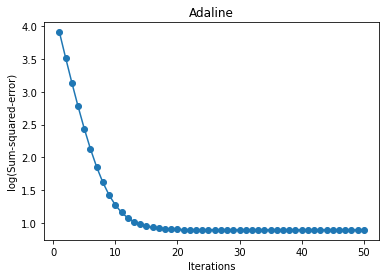

In [12]:
plt.plot(range(1, len(ada.cost_)+1), np.log(ada.cost_), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline')
plt.show()

In [13]:
X = df.iloc[0:100, [0,1]].values

ada = AdalineGD()
ada.train(X, y)
print("Residual Cost: ",ada.cost_)

Residual Cost:  [50.0, 143.185607735, 182658.90453224975, 289446613.05725354, 458710144042.5593, 726956185575029.8, 1.1520680382192179e+18, 1.8257782119790587e+21, 2.8934628587475415e+24, 4.585511679360275e+27, 7.267042429102115e+30, 1.1516687636861045e+34, 1.8251454483583587e+37, 2.892460065515128e+40, 4.583922469370825e+43, 7.264523875616781e+46, 1.1512696275303669e+50, 1.824512904035816e+53, 2.891457619822775e+56, 4.582333810157072e+59, 7.262006194991589e+62, 1.1508706297040484e+66, 1.8238805789354293e+69, 2.8904555215500378e+72, 4.580745701528128e+75, 7.259489386924018e+78, 1.1504717701592069e+82, 1.8232484729812207e+85, 2.8894537705765137e+88, 4.579158143293187e+91, 7.256973451111681e+94, 1.150073048847921e+98, 1.8226165860972462e+101, 2.8884523667818365e+104, 4.577571135261489e+107, 7.254458387252267e+110, 1.1496744657222787e+114, 1.8219849182075743e+117, 2.887451310045679e+120, 4.575984677242346e+123, 7.251944195043579e+126, 1.149276020734391e+130, 1.821353469236312e+133, 2.8864

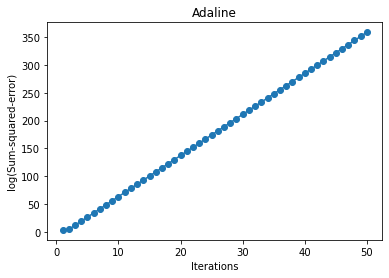

In [14]:
plt.plot(range(1, len(ada.cost_)+1), np.log(ada.cost_), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline')
plt.show()

#### As can be seen in resulting prints above, there is large variation in costs when gradient descent is run without feature scaling as compared to when applying feature scaling. From the graphs above, it can also be known that the cost function diverges when feature scaling is not applied while it converges fast when it is applied. While comparing the costs, it can also be understood that gradient moves more in a straight direction towards the minima when features are scaled while it moves in a zigzag pattern when features are not scaled(i.e. if we were to plot it on a contour plot). When we do differentiation with features with high range values, we may get derivatives which are greater as compared to when differentiation applied to features which have low range values. This would lead to abnormal weights getting updated, and would add certain biasness to our model regarding those features, even when the two features in this case have equal importance. 

In [36]:
import random
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada = AdalineGD(eta = 0.001)
ada.train(X_std, y)
test = []
y_test = []
for i in range(5000):
    test.append([random.uniform(4,7),random.uniform(3,4)])
test = np.array(test)
test[:,0] = (test[:,0] - test[:,0].mean()) / test[:,0].std()
test[:,1] = (test[:,1] - test[:,1].mean()) / test[:,1].std()
y_test.append(ada.predict(test))


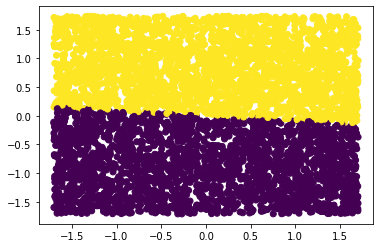

In [37]:
plt.scatter(test[:,0], test[:,1], c = y_test)